# kmeans_si demo

import packages

In [1]:
from si4ul import kmeans_si

import numpy as np
import seaborn as sns

setting

In [2]:
random_seed = 0
np.random.seed(random_seed)

iris = sns.load_dataset('iris')
X = iris.iloc[:, 0:4].to_numpy()
cov = np.eye(X.shape[0])

K = 3
comparison_clusters = [1, 2]
gene_id = 0

k-means clustering algorithm

In [3]:
obs_model = kmeans_si.kmeans(X, K)
obs_model.labels_, obs_model.cluster_centers_

(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]),
 array([[ 1.03014756,  0.00611808,  0.94045402,  0.9693151 ],
        [-0.16784349, -0.96945035,  0.25900292,  0.17484752],
        [-0.99872072,  0.90322901, -1.29875725, -1.25214931]]))

plot scatter data in inputted 2-dims per cluster using test

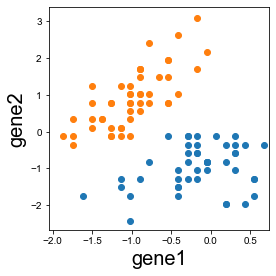

In [4]:
kmeans_si.plot_scatter(obs_model, comparison_clusters, [gene_id, 1])

plot histogram of distribution per cluster using test

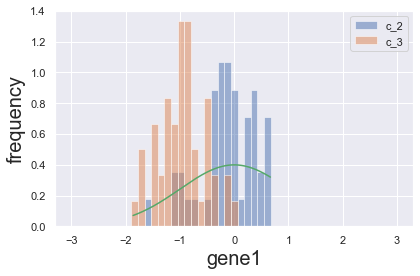

In [5]:
kmeans_si.plot_histogram(obs_model, comparison_clusters, gene_id, is_plot_norm=True)

plot violin per cluster using test and other

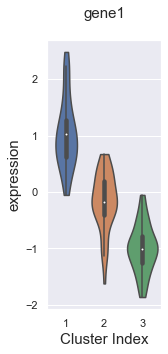

In [6]:
kmeans_si.plot_violin(obs_model, gene_id)

post clustering inference for test between clusters about a feature

In [7]:
test_statistics, hpci_p, naive_p = kmeans_si.pci_gene(obs_model, comparison_clusters, gene_id)
test_statistics, hpci_p, naive_p

(0.8308772358010332, 1.568287857567352e-05, 2.5919711663435763e-05)

post clustering inference for test between clusters

In [8]:
test_statistics, hpci_p, naive_p = kmeans_si.pci_cluster(obs_model, comparison_clusters)
test_statistics, hpci_p, naive_p

(14.334404574203973, 0.0, 2.497889473784876e-43)

post clustering inference for all cluster combinations. If test_gene is set, test is PCI_gene. otherwise, test is PCI_cluster.

In [9]:
stat_matrix, hpci_p_matrix, naive_p_matrix = kmeans_si.all_clusters_combination_test(obs_model, test_gene=0)
stat_matrix, hpci_p_matrix, naive_p_matrix

pci_gene for feature No.0


(array([[       nan, 1.19799105, 2.02886829],
        [       nan,        nan, 0.83087724],
        [       nan,        nan,        nan]]),
 array([[           nan, 7.62111784e-01, 3.70760329e-01],
        [           nan,            nan, 1.56828786e-05],
        [           nan,            nan,            nan]]),
 array([[           nan, 1.01191366e-09, 0.00000000e+00],
        [           nan,            nan, 2.59197117e-05],
        [           nan,            nan,            nan]]))

plot matrix of statistics that is calculated by each cluster combinations

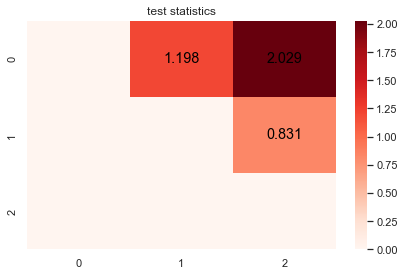

In [10]:
kmeans_si.plot_statistics_matrix(stat_matrix)

plot matrix of p-value that is calculated by each cluster combinations

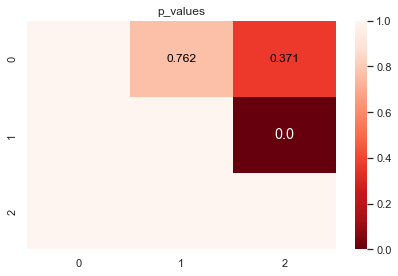

In [11]:
kmeans_si.plot_p_matrix(hpci_p_matrix)